In [1]:
import torch
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *

/home/rocky/environments/train_pytorch/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:
n=7
d=784
I=np.eye(n)
A=get_xinmeng_matrix(n=n).T 
A=0.9*A+0.1*I
B=get_B(A=A,u=2*n,n=n)
epochs=400

Training Progress: 100%|██████████| 400/400 [00:59<00:00,  6.71it/s, accuracy=83.2230721522%, epoch=400, loss=0.3566535158]


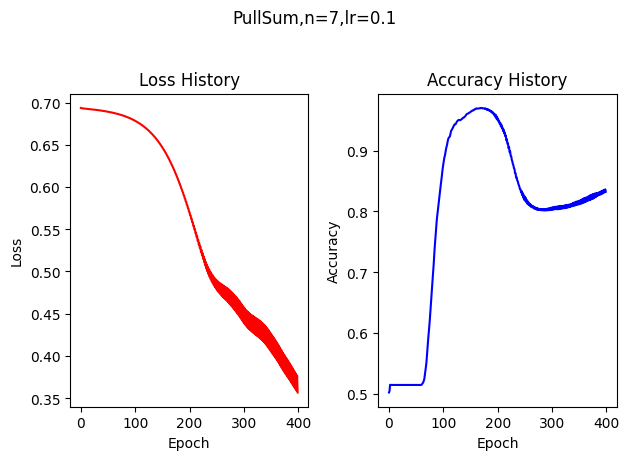

In [3]:
l,a=train_PullSum(n=n,d=d,A=A,B=B,seed_for_model=49,criterion=nn.BCELoss(),epochs=epochs,lr=(0.1/n)) 